In [68]:
import torch

from models.t2t_vit import *
from vit_shapley.modules.surrogate import Surrogate
from vit_shapley.CIFAR_10_Dataset import CIFAR_10_Dataset, CIFAR_10_Datamodule

In [69]:
datamodule = CIFAR_10_Datamodule()
datamodule.setup()
data = next(iter(datamodule.train_dataloader()))

images = data['images']
labels = data['labels']
masks = data['masks']

Files already downloaded and verified
Files already downloaded and verified


In [70]:
surrogate = Surrogate(output_dim=10,
                          target_model=t2t_vit_14(),
                          learning_rate=1e-3,
                          weight_decay=0.0,
                          decay_power=None,
                          warmup_steps=None)

adopt performer encoder for tokens-to-token
adopt performer encoder for tokens-to-token


In [71]:
print(masks.shape)

torch.Size([32, 2, 196])


In [72]:
out = surrogate(images=images, masks=masks[:,0])
out.keys()

dict_keys(['logits'])

In [73]:
out['logits'].shape

torch.Size([32, 1, 10])

In [74]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img, label):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.title(classes[label])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


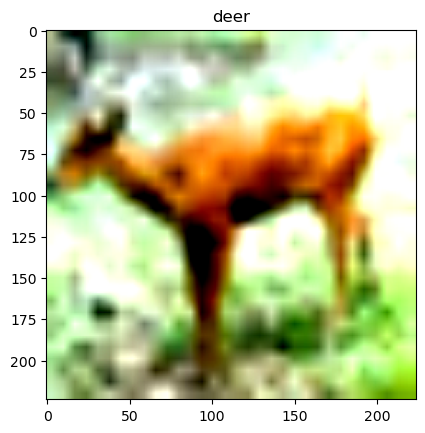

In [75]:
imshow(images[0], labels[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


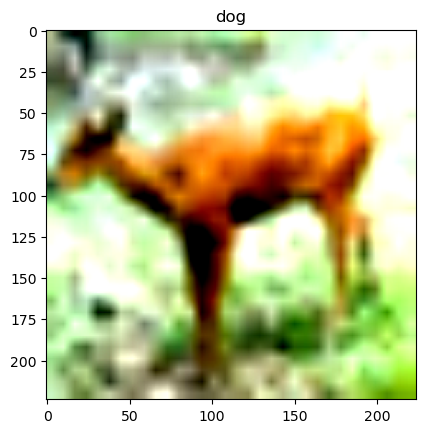

In [76]:
labels_pred = torch.argmax(torch.nn.functional.softmax(out['logits'].squeeze(), dim=1), dim=1)
imshow(images[0], labels_pred[0])

In [77]:
labels_pred

tensor([5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])